# 1. Importing Some Important Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression #importing sklearn package for modeling linear regression
from sklearn.linear_model import Ridge #importing sklearn package for  ridge regularization
from sklearn.linear_model import Lasso #importing sklearn package for lasso regularization
from sklearn.model_selection import GridSearchCV #importing sklearn package for grid search cross validation
from sklearn.metrics import mean_squared_error, r2_score #importing sklearn package for checking model performance

# 2. Data Exploration

In [ ]:
pd.set_option('display.max_rows', None)
#reading data
housing_train = pd.read_csv("train.csv")

In [ ]:
#data summary
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

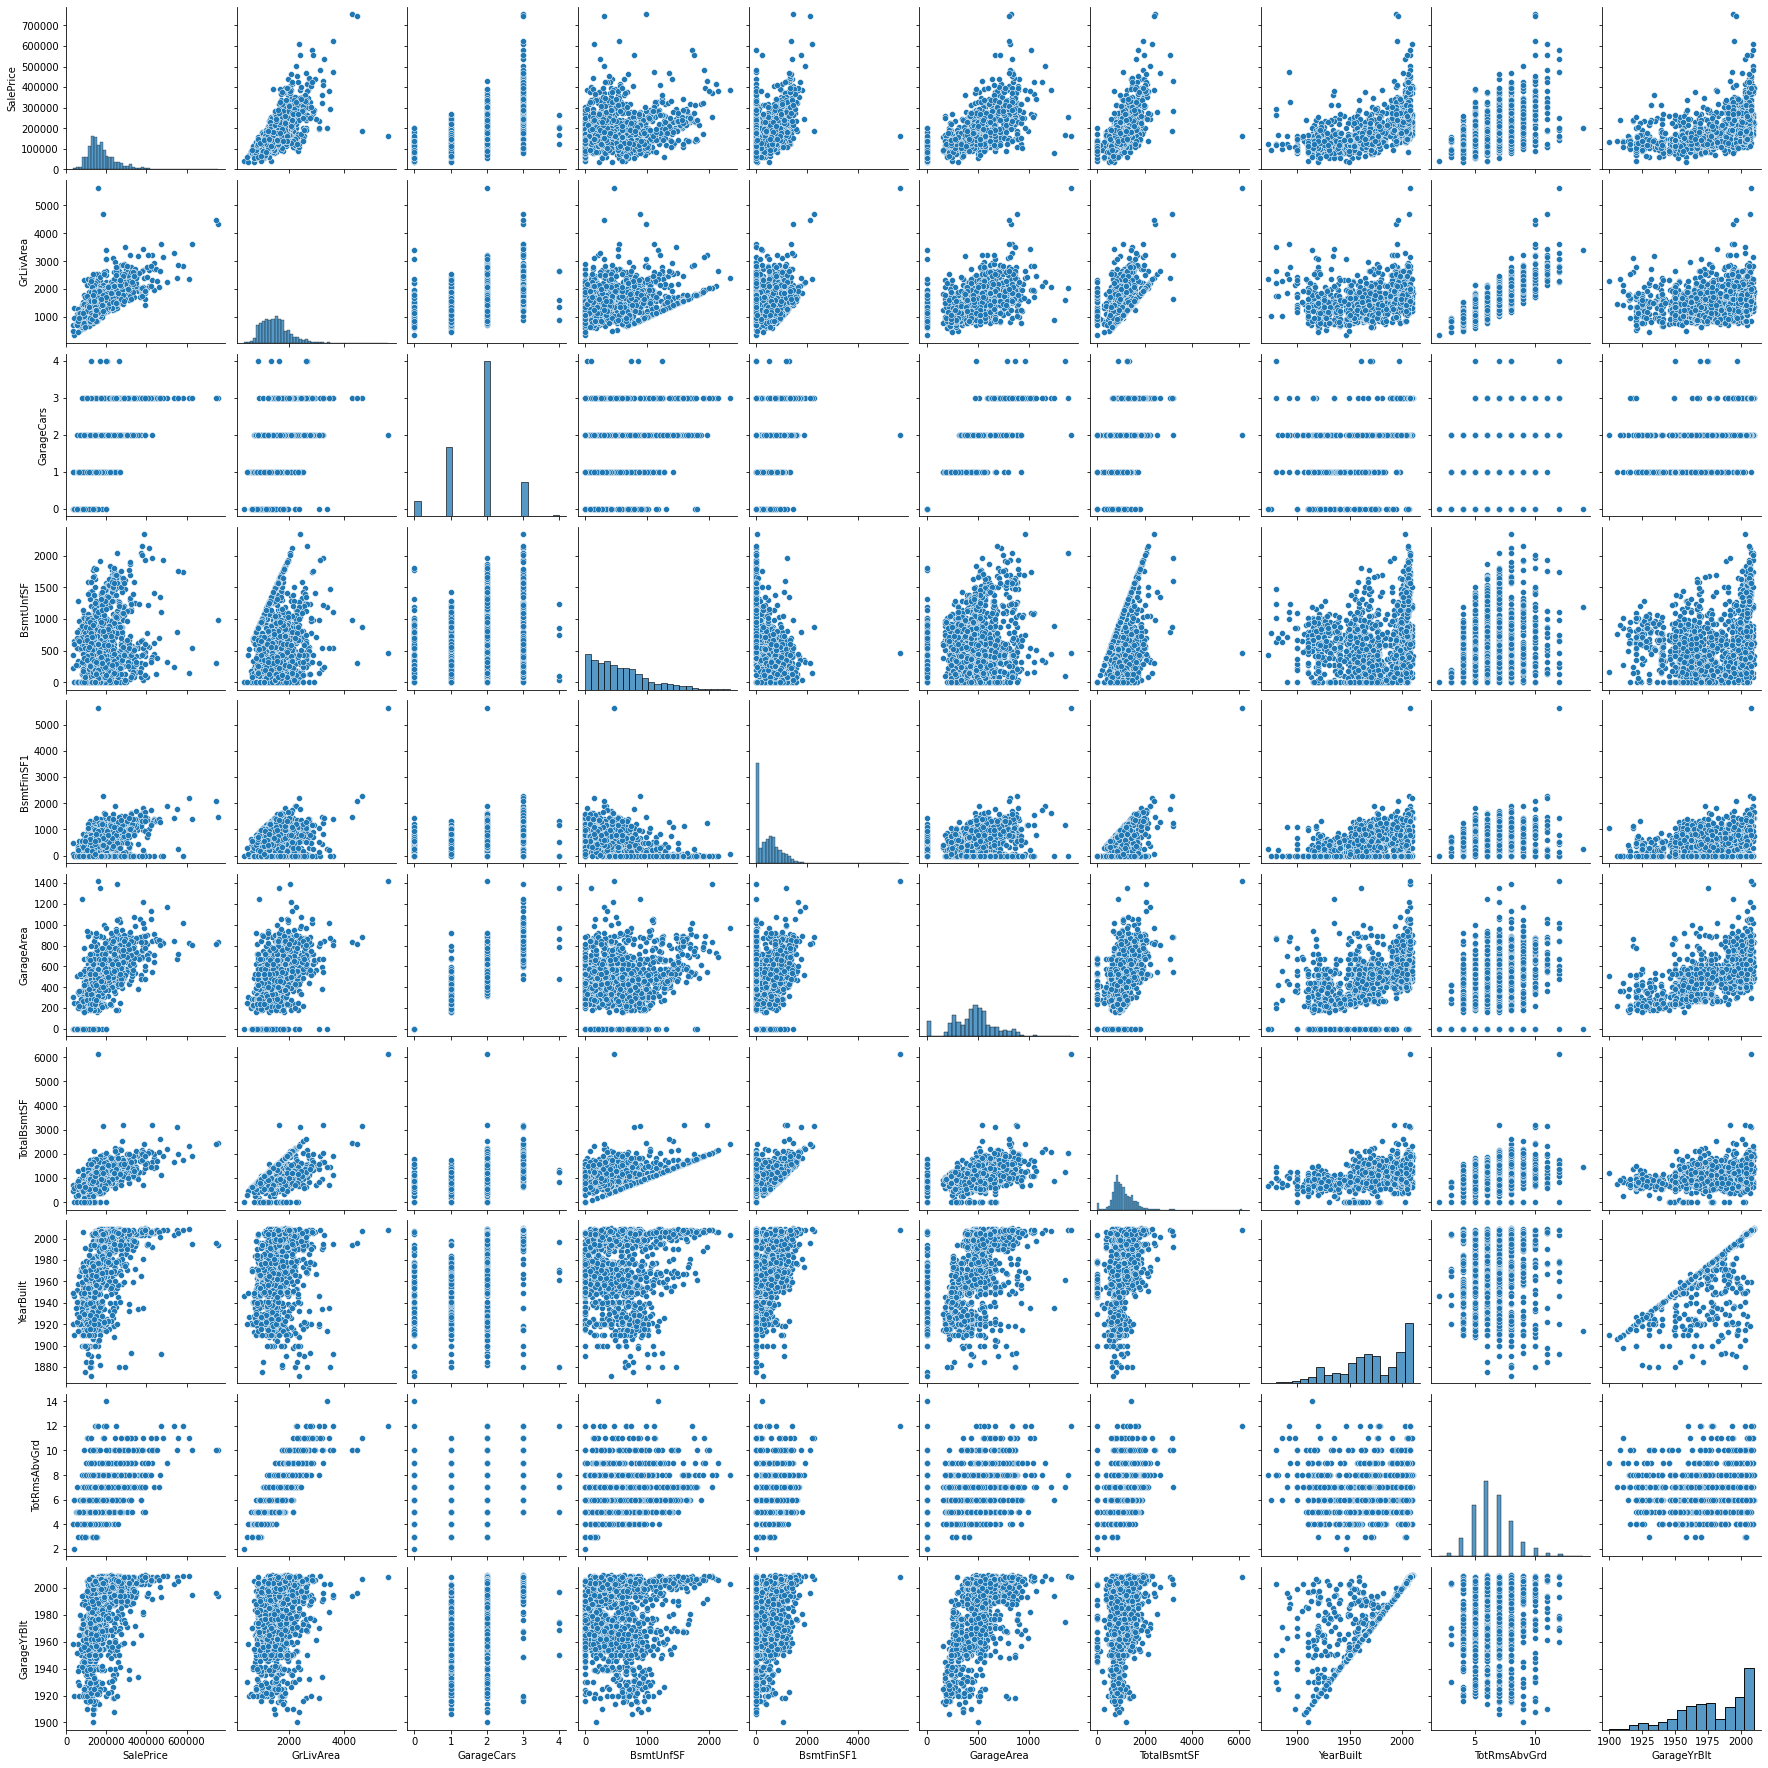

In [446]:
#Categorical columns
num_cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing_train[num_cols])
plt.show()

In [450]:
housing_data_numeric = housing_train.select_dtypes(include=['float64', 'int64'])
housing_data_numeric = housing_data_numeric.drop(['Id'], axis=1)
housing_data_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


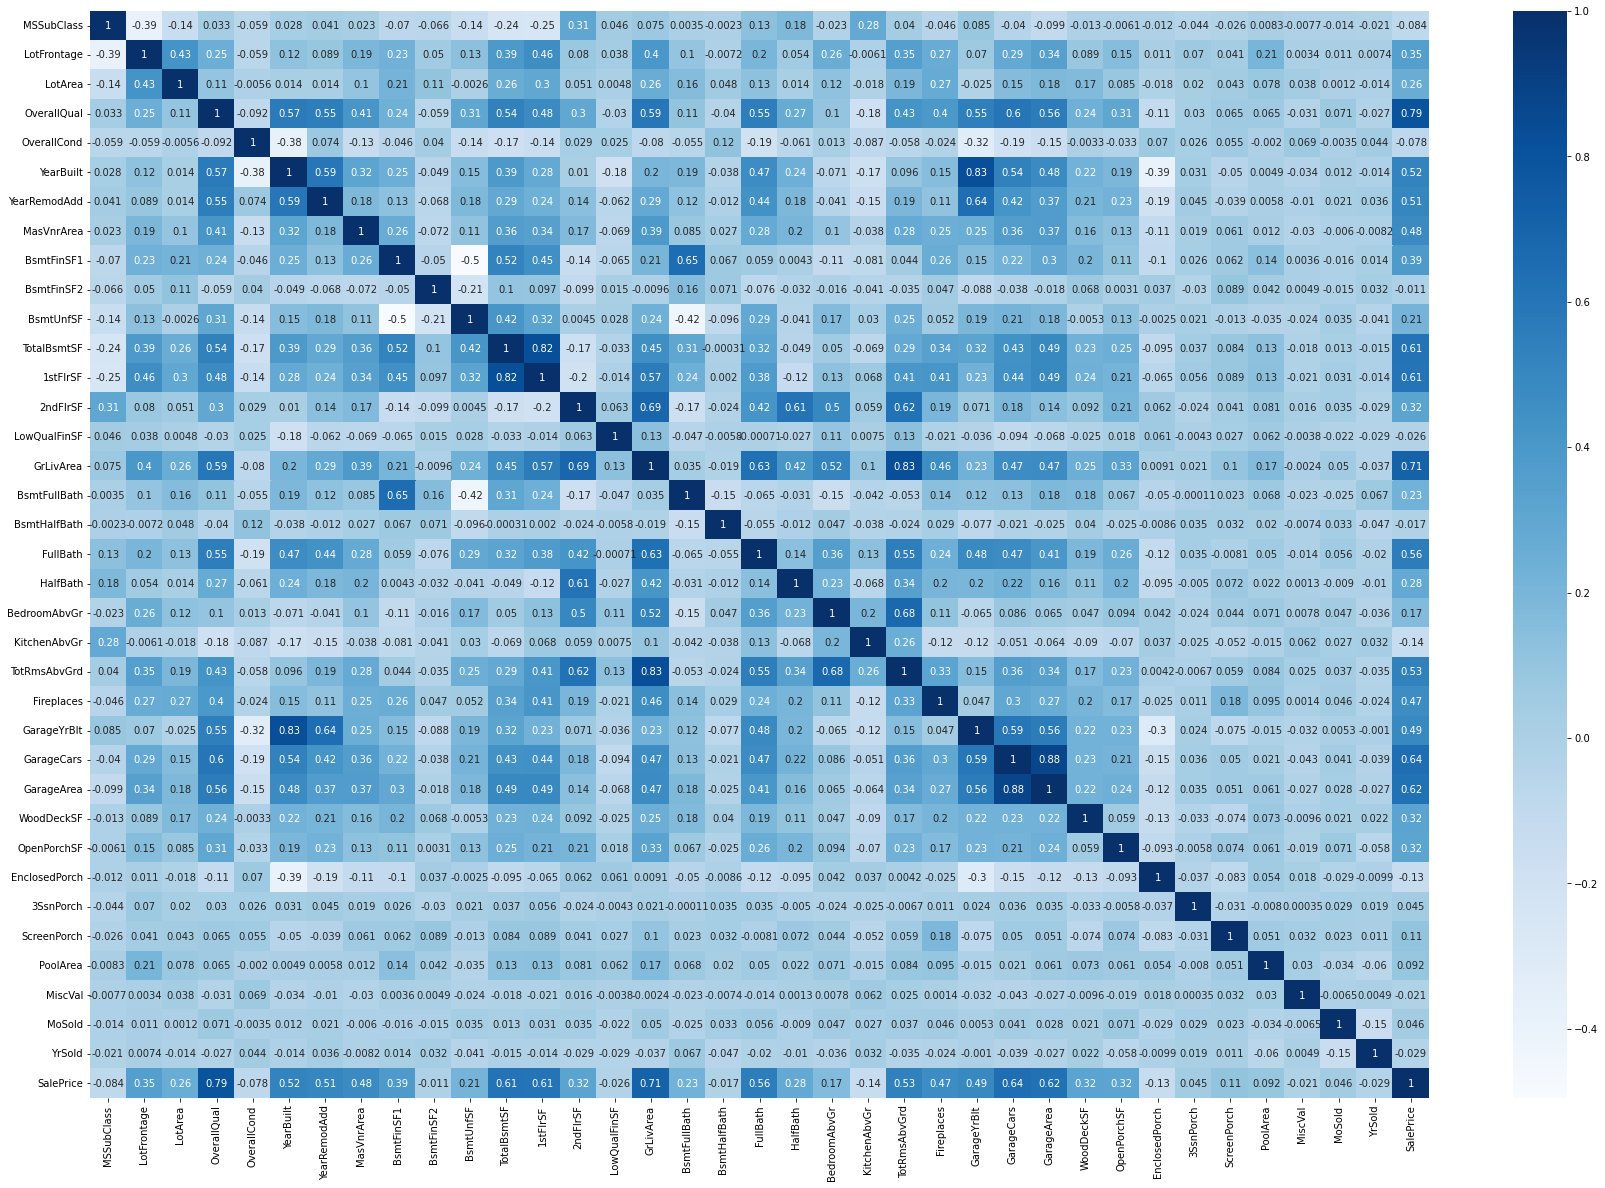

In [453]:
# correlation matrix
cor = housing_data_numeric.corr()
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="Blues", annot=True)
plt.show()

In [ ]:
#data description
housing_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
#checking columns with null values
for i in housing_train.columns:
  if housing_train[i].isnull().sum() > 0:
    print(i, " : ", housing_train[i].isnull().sum())
  #['SalePrice'].isnull().sum()

LotFrontage  :  259
Alley  :  1369
MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
FireplaceQu  :  690
GarageType  :  81
GarageYrBlt  :  81
GarageFinish  :  81
GarageQual  :  81
GarageCond  :  81
PoolQC  :  1453
Fence  :  1179
MiscFeature  :  1406


In [ ]:
#dropping columns with majority null values : Alley, PoolQC, Fence, MiscFeature
col_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
housing_col_01 = list(housing_train.columns)
for j in col_drop:
  housing_col_01.remove(j)

housing_train_02 = housing_train[housing_col_01]

In [ ]:
#checking columns with null values in our new dataframe
for i in housing_train_02.columns:
  if housing_train_02[i].isnull().sum() > 0:
    print(i, " : ", housing_train_02[i].isnull().sum())
  #['SalePrice'].isnull().sum()

LotFrontage  :  259
MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
FireplaceQu  :  690
GarageType  :  81
GarageYrBlt  :  81
GarageFinish  :  81
GarageQual  :  81
GarageCond  :  81


In [ ]:
#checking "FireplaceQu" column
housing_train_02['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
#We need to replace the null value in FireplaceQu with "NA" to represent th e housesw with no fireplace
housing_train_02['FireplaceQu'] = housing_train_02['FireplaceQu'].fillna('NA')

In [ ]:
#checking "FireplaceQu" column
housing_train_02['FireplaceQu'].value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
#checking "LotFrontage" column
housing_train_02['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

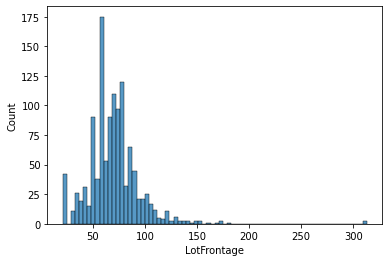

In [ ]:
#plotting LotFrontage
sns.histplot(housing_train_02['LotFrontage'])
plt.show()

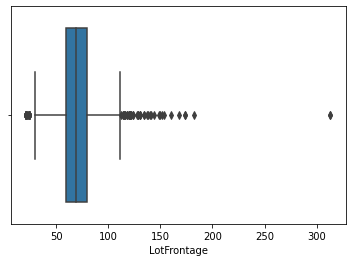

In [ ]:
sns.boxplot(housing_train_02['LotFrontage'])
plt.show()

In [ ]:
#since there's outlier in data, we'll do a median imputation for missing values in housing_train_02['LotFrontage']
housing_train_02['LotFrontage'] = housing_train_02['LotFrontage'].fillna(housing_train_02['LotFrontage'].median())

In [ ]:
#checking "GarageType" column
housing_train_02['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [ ]:
#checking "GarageYrBlt" column
housing_train_02['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [ ]:
#checking "GarageFinish" column
housing_train_02['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [ ]:
#checking "GarageQual" column
housing_train_02['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [ ]:
#checking "GarageCond" column
housing_train_02['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
#it appears as "NA" is mssing from GarageType, GarageFinish,GarageQual,GarageCond
#we'll replace blanks wth "NA" to represent "No Garage'"
housing_train_02['GarageType'] = housing_train_02['GarageType'].fillna('NA')
housing_train_02['GarageFinish'] = housing_train_02['GarageFinish'].fillna('NA')
housing_train_02['GarageQual'] = housing_train_02['GarageQual'].fillna('NA')
housing_train_02['GarageCond'] = housing_train_02['GarageCond'].fillna('NA')


In [ ]:
#it appears as "NA" is mssing from BsmtQual, BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
#we'll replace blanks wth "NA" to represent "No Garage'"
housing_train_02['BsmtQual'] = housing_train_02['BsmtQual'].fillna('NA')
housing_train_02['BsmtCond'] = housing_train_02['BsmtCond'].fillna('NA')
housing_train_02['BsmtExposure'] = housing_train_02['BsmtExposure'].fillna('NA')
housing_train_02['BsmtFinType1'] = housing_train_02['BsmtFinType1'].fillna('NA')
housing_train_02['BsmtFinType2'] = housing_train_02['BsmtFinType2'].fillna('NA')


In [ ]:
#we can drop column GarageYrBlt , since it doesn't provide us with any useful information
housing_train_02.drop(['GarageYrBlt'], axis = 1, inplace = True)

In [ ]:
#checking columns with null values in our new dataframe
for i in housing_train_02.columns:
  if housing_train_02[i].isnull().sum() > 0:
    print(i, " : ", housing_train_02[i].isnull().sum())
  #['SalePrice'].isnull().sum()

MasVnrType  :  8
MasVnrArea  :  8
Electrical  :  1


In [ ]:
#rest of the null rws can be droped since they are very miniscul in number
housing_train_03 = housing_train_02.dropna()

In [ ]:
housing_train_03.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2


In [ ]:
#we can also drip Id colummn.
housing_train_03.drop(['Id'], axis = 1, inplace = True)

In [ ]:
#converting categorical columns into numerical by using pandas get_dummies
housing_train_04 = pd.get_dummies(housing_train_03, drop_first=True, )

In [ ]:
housing_train_04.head().transpose()

,0,1,2,3,4
MSSubClass,60.0,20.0,60.0,70.0,60.0
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0
OverallQual,7.0,6.0,7.0,7.0,8.0
OverallCond,5.0,8.0,5.0,5.0,5.0
YearBuilt,2003.0,1976.0,2001.0,1915.0,2000.0
YearRemodAdd,2003.0,1976.0,2002.0,1970.0,2000.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0


**Splitting the data into Training and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(housing_train_04, train_size = 0.7, random_state = 1)

In [ ]:
y = housing_train_04.pop('SalePrice')
X = housing_train_04
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 1)

**Rescaling the Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

**Plotting Some Numerical Variables against our Target variable**

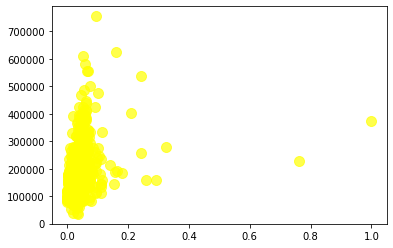

In [ ]:
plt.scatter(X_train_df['LotArea'],y_train,c= 'Yellow', alpha= 0.7, s = 100)
plt.show()

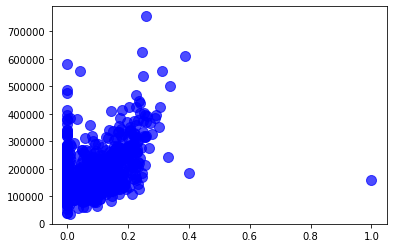

In [ ]:
plt.scatter(df_train_scaled['BsmtFinSF1'],y_train,c= 'Blue', alpha= 0.7, s = 100)
plt.show()

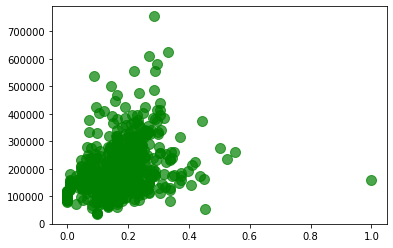

In [ ]:
plt.scatter(df_train_scaled['LotFrontage'],y_train,c= 'Green', alpha= 0.7, s = 100)
plt.show()

There appears to be linear relation between some predictor variables and target variables. We'll performe feature engineering using lasso regularization.

**Dividing into X and Y for model building**

**Feature Selection Using Lasso**

In [ ]:
reg = LinearRegression() 
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predictions on the basis of the model
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr : ",r2_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr : ",r2_test_lr)

#residual sum of squares
rss_train_lr = np.sum(np.square(y_train-y_pred_train))
print("rss_train_lr : ",rss_train_lr)
rss_test_lr = np.sum(np.square(y_test-y_pred_test))
print("rss_test_lr : ",rss_test_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("mse_train_lr : ",mse_train_lr)
mse_test_lr = mean_squared_error(y_test,y_pred_test)
print("mse_test_lr : ",mse_test_lr)


r2_train_lr :  0.932372086920576
r2_test_lr :  0.29946259874667835
rss_train_lr :  449348552210.7603
rss_test_lr :  1728783211435.8672
mse_train_lr :  442707933.21257174
mse_test_lr :  3965099108.7978606


**Ridge Regression**

In [ ]:
#list of alphas for hyperparameter tuning
params = {'alpha' : [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,
                     0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,
                     6.0,7.0,8.0,9.0,10.0,20,30.0,40.0,50,60,
                     70,80,90,100,500,1000]}

ridge = Ridge()

#cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1)

ridge_model_cv.fit(X_train,y_train)



Fitting 5 folds for each of 34 candidates, totalling 170 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30.0,
                                   40.0, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
#printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 20}


In [466]:
#fitting the ridge model for alpha = 20 and printing coefficients ewhich has been penalised
alpha = 20
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.92935386e+02 -1.89726353e+02  5.31491906e-01  1.14140721e+04
  5.15284238e+03  2.19168276e+02  1.13702096e+02  4.08461649e+01
 -1.75398067e+00  5.63996592e+00 -4.26787926e-01  3.45919693e+00
  6.19406076e+00  2.07258507e+01  9.83982392e-01  2.79038943e+01
  5.92271098e+03  1.27029251e+03  7.40888407e+03  1.27193298e+03
 -2.97704320e+03 -7.53377324e+03  4.12931154e+03  6.45381324e+03
  1.27226229e+04  3.93619568e+00  2.70315603e+01 -6.31157182e+00
  3.45199364e+01  4.15522037e+01  6.18466385e+01 -8.38242608e+01
 -9.19628813e-01 -3.33120568e+02 -4.10920499e+02  4.44879029e+03
  4.42305396e+02  3.42199479e+03 -2.32331848e+03  3.15469429e+03
  6.12094598e+03 -6.51276085e+03 -1.35995509e+02  7.11519742e+03
  1.43387332e+03  8.93557514e+03 -3.15027272e+03  9.96928001e+03
 -4.87033714e+03 -1.37468010e+03 -2.17780177e+03  6.82616631e+03
 -5.42336451e+03  0.00000000e+00 -6.52211177e+02  4.36428265e+03
  3.73819990e+02 -4.69913661e+03  1.45823338e+04 -1.23204934e+04
 -8.26064996e+03 -4.11225

In [467]:
# Predictions on the basis of the model
y_pred_train_rid = ridge.predict(X_train)
y_pred_test_rid = ridge.predict(X_test)

r2_train_rid = r2_score(y_train, y_pred_train_rid)
print("r2_train_rid : ",r2_train_rid)
r2_test_rid = r2_score(y_test, y_pred_test_rid)
print("r2_test_rid : ",r2_test_rid)

#residual sum of squares
rss_train_rid = np.sum(np.square(y_train-y_pred_train_rid))
print("rss_train_rid : ",rss_train_rid)
rss_test_rid = np.sum(np.square(y_test-y_pred_test_rid))
print("rss_test_rid : ",rss_test_rid)

mse_train_rid = mean_squared_error(y_train,y_pred_train_rid)
print("mse_train_rid : ",mse_train_rid)
mse_test_rid = mean_squared_error(y_test,y_pred_test_rid)
print("mse_test_rid : ",mse_test_rid)


r2_train_rid :  0.8838236824923261
r2_test_rid :  0.8629747867313836
rss_train_rid :  771924752608.3142
rss_test_rid :  338150236972.91864
mse_train_rid :  760516997.6436594
mse_test_rid :  775573938.0112813


**Lasso**

In [468]:
lasso = Lasso()

#cross validation
lasso_model_cv = GridSearchCV(estimator = lasso,
                              param_grid = params,
                              scoring = 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score = True,
                              verbose = 1)

lasso_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30.0,
                                   40.0, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [469]:
#printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 20}


In [474]:
#fitting the lasso model for alpha = 20 and printing coefficients ewhich has been penalised
alpha = 80
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-2.35656700e+02 -1.54363149e+02  4.94120278e-01  9.31724627e+03
  5.13327703e+03  2.41615154e+02  1.09658649e+02  3.30161987e+01
 -8.93241047e-01  9.22327302e+00  1.49166622e-01  2.24078810e-01
  3.11071951e+01  4.46821763e+01  1.49104845e+01  5.40270270e+00
  5.58670220e+03  1.04696007e+03  8.06095848e+03  0.00000000e+00
 -2.31214880e+03 -1.20583746e+04  3.38165870e+03  5.14766629e+03
  1.20077055e+04  1.92902667e+00  2.13679294e+01  2.03434287e+00
  3.49675803e+01  3.86244500e+01  5.44013589e+01 -6.67814370e+01
 -9.97629219e-01 -2.85601940e+02 -2.92130120e+02  4.80863725e+03
  0.00000000e+00  2.26135038e+03 -0.00000000e+00  4.69559296e+02
  3.95378081e+03 -8.92792816e+03  5.01434328e+02  7.93761841e+03
  0.00000000e+00  1.11227850e+04 -0.00000000e+00  1.40001687e+04
 -4.19845966e+03 -0.00000000e+00 -8.49641206e+02  5.92474654e+03
 -5.29953446e+03  0.00000000e+00  0.00000000e+00  3.78808823e+03
  0.00000000e+00  0.00000000e+00  2.60697679e+04 -1.07992382e+04
 -2.98836473e+03 -6.13049

In [475]:
# Predictions on the basis of the model
y_pred_train_las = lasso.predict(X_train)
y_pred_test_las = lasso.predict(X_test)

r2_train_las = r2_score(y_train, y_pred_train_las)
print("r2_train_las : ",r2_train_las)
r2_test_las = r2_score(y_test, y_pred_test_las)
print("r2_test_las : ",r2_test_las)

#residual sum of squares
rss_train_las = np.sum(np.square(y_train-y_pred_train_las))
print("rss_train_las : ",rss_train_las)
rss_test_las = np.sum(np.square(y_test-y_pred_test_las))
print("rss_test_las : ",rss_test_las)

mse_train_las = mean_squared_error(y_train,y_pred_train_las)
print("mse_train_las : ",mse_train_las)
mse_test_las = mean_squared_error(y_test,y_pred_test_las)
print("mse_test_las : ",mse_test_las)


r2_train_las :  0.8987391950696177
r2_test_las :  0.8724021293573693
rss_train_las :  672819757689.7795
rss_test_las :  314885481042.5436
mse_train_las :  662876608.5613592
mse_test_las :  722214406.0608798


In [476]:
betas = pd.DataFrame(index = X.columns)

betas.rows = X.columns
betas['Feature'] = betas.rows

In [477]:
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_


In [478]:
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, MSSubClass to SaleCondition_Partial
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  245 non-null    object 
 1   Linear   245 non-null    float64
 2   Ridge    245 non-null    float64
 3   Lasso    245 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.7+ KB


In [479]:
pd.set_option('display.max_rows', None)
betas

,Feature,Linear,Ridge,Lasso
MSSubClass,MSSubClass,-7.606598e+01,-192.935386,-235.656700
LotFrontage,LotFrontage,5.847963e+01,-189.726353,-154.363149
LotArea,LotArea,7.210766e-01,0.531492,0.494120
OverallQual,OverallQual,5.584999e+03,11414.072139,9317.246267
OverallCond,OverallCond,5.782642e+03,5152.842381,5133.277026
YearBuilt,YearBuilt,3.318288e+02,219.168276,241.615154
YearRemodAdd,YearRemodAdd,8.668580e+01,113.702096,109.658649
MasVnrArea,MasVnrArea,3.147259e+01,40.846165,33.016199
BsmtFinSF1,BsmtFinSF1,1.372238e+01,-1.753981,-0.893241
BsmtFinSF2,BsmtFinSF2,9.436755e+00,5.639966,9.223273


In [480]:
#Using lasso to get the features with coefficient which are not zero.
betas[betas['Lasso'] !=0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, MSSubClass to SaleCondition_Normal
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  128 non-null    object 
 1   Linear   128 non-null    float64
 2   Ridge    128 non-null    float64
 3   Lasso    128 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.0+ KB


In [486]:
betas[betas['Lasso'] !=0].sort_values(by = ['Lasso'], ascending = False)

,Feature,Linear,Ridge,Lasso
RoofMatl_WdShngl,RoofMatl_WdShngl,711370.029296,15375.684240,78471.697727
Neighborhood_StoneBr,Neighborhood_StoneBr,39093.227219,17652.487714,43867.662066
Neighborhood_NoRidge,Neighborhood_NoRidge,23673.424542,17207.243139,37480.558313
Neighborhood_NridgHt,Neighborhood_NridgHt,19399.086574,21062.547120,37170.600169
Neighborhood_Crawfor,Neighborhood_Crawfor,16295.736329,14582.333805,26069.767866
SaleType_New,SaleType_New,51105.821279,9621.329759,19460.546652
BsmtExposure_Gd,BsmtExposure_Gd,13412.689545,14008.881146,18676.937443
SaleCondition_Alloca,SaleCondition_Alloca,35356.308518,6265.781650,17100.806245
LotConfig_CulDSac,LotConfig_CulDSac,13359.746749,9969.280006,14000.168740
RoofMatl_CompShg,RoofMatl_CompShg,655909.563694,-449.915425,13197.968462


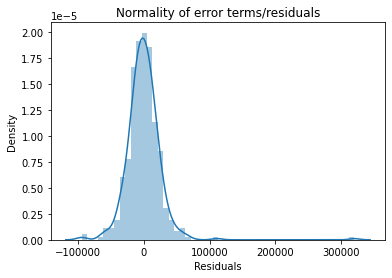

In [482]:
y_res=y_test-y_pred_test_las
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

Text(0, 0.5, 'ytest-ypred')

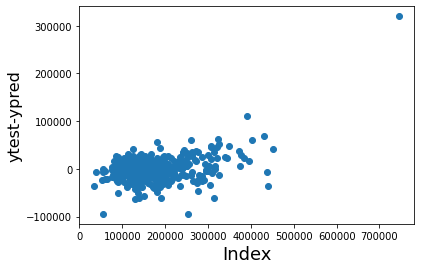

In [483]:
plt.scatter(y_test,y_res)
plt.xlabel('Index', fontsize=18) 
plt.ylabel('ytest-ypred', fontsize=16)